In [1]:
import numpy as np
import pandas as pd
import math  
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('drug2.csv')
df['DS_combo']= df.dose * df.sex
df1 = df.copy(deep=True)
#print (df)
df_train,df_test = train_test_split(df1, test_size=0.2)
df1_train,df1_test = train_test_split(df1, test_size=0.3)

In [3]:
clf = LinearRegression(normalize=True)
X = df_train[['dose','sex','DS_combo']]
y = df_train['response']
clf.fit(X,y)
score = clf.score(X,y) #To calculate R Square value.
print (score)#THis also is a R square value.

y_pred = clf.predict(df_test[['dose','sex','DS_combo']])
#print (y_pred)
r2_value = r2_score(df_test['response'],y_pred)
print ('R^2 Value is :',r2_value) # Another approach to calculate R square value.

0.9992531630720963
('R^2 Value is :', 0.9992234860174416)


In [22]:
result=smf.ols(formula="response ~ dose+sex+DS_combo", data=df).fit()
print (result.params)
print (result.summary())

Intercept     4.785738
dose          2.941714
sex           4.935299
DS_combo     24.120643
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.415e+06
Date:                Wed, 20 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:58:24   Log-Likelihood:                -7223.6
No. Observations:                3200   AIC:                         1.446e+04
Df Residuals:                    3196   BIC:                         1.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [5]:
data = np.array([df_test['response'],y_pred,np.subtract(df_test['response'],y_pred)])
print (data)

[[277.86       261.62        94.28       ... 113.03        44.61
  120.97      ]
 [280.30868739 264.07431227  90.90764429 ... 112.55347779  47.6159773
  117.96493616]
 [ -2.44868739  -2.45431227   3.37235571 ...   0.47652221  -3.0059773
    3.00506384]]


In [6]:
dataset = pd.DataFrame({'resp_test':data[0,:],'y_pred':data[1,:],'Error':data[2,:]})
#print(dataset)
#dataset['stan_error']=dataset['Error']
#dataset['stan_error']=((dataset['stan_error']-dataset['stan_error'].mean())/dataset['stan_error'].std())

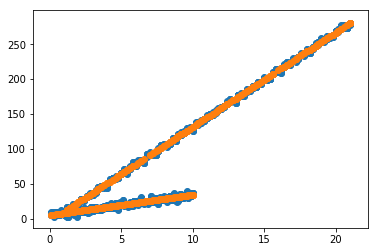

In [7]:
plt.scatter(df_train['dose']+df_train['sex']+df_train['DS_combo'],y)
plt.scatter(df_test['sex']+df_test['dose']+df_test['DS_combo'], y_pred) #Largely fitting model over our data distribution.

/home/abhishek/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Range of error')

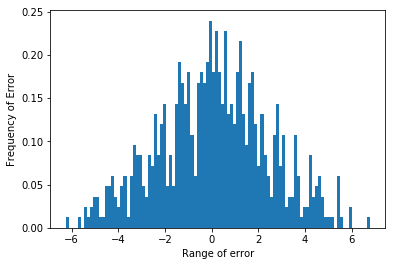

In [8]:
plt.hist(np.asarray(dataset['Error'], dtype='float'), bins=100, normed=True) #plot of frequency of errors vs range of errors.
plt.ylabel('Frequency of Error');
plt.xlabel('Range of error') #THese are the errors divided into bins of approx. equal sizes.

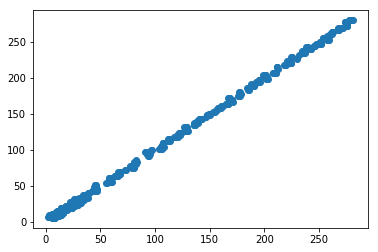

In [9]:
plt.scatter(df_test['response'], y_pred) #Pre

In [11]:
rmse = mean_squared_error(df_test['response'], y_pred)
print (rmse)#Print the RMSE for fiorst split.

5.524502922161547


In [13]:
clf2 = LinearRegression(normalize=True)
X2 = df1_train[['dose','sex','DS_combo']]
y2 = df1_train['response']
clf2.fit(X2,y2)
score = clf2.score(X2,y2) #To calculate R Square value.
print (score)#THis also is a R square value.

y_pred2 = clf2.predict(df1_test[['dose','sex','DS_combo']])
#print (y_pred)
r2_value_2 = r2_score(df1_test['response'],y_pred2)
print ('R^2 Value is :',r2_value_2) # Another approach to calculate R square value.

0.9992515212057174
('R^2 Value is :', 0.9992347002807783)


In [14]:
rmse2 = mean_squared_error(df1_test['response'], y_pred2)
print (rmse2)#Print RMSE for second train, test split.

5.595009461431675


In [16]:
result2=smf.ols(formula="response ~ dose+sex+DS_combo", data=df1).fit()
print (result2.params)
#print (result2.summary())

Intercept     4.785738
dose          2.941714
sex           4.935299
DS_combo     24.120643
dtype: float64


In [18]:
data2 = np.array([df1_test['response'],y_pred2,np.subtract(df1_test['response'],y_pred2)])
print (data2)

[[ 1.54900000e+01  2.29050000e+02  4.52600000e+01 ...  1.88440000e+02
   1.61290000e+02  9.14000000e+00]
 [ 1.31875925e+01  2.26210623e+02  5.02876425e+01 ...  1.88319520e+02
   1.61254446e+02  9.62385884e+00]
 [ 2.30240753e+00  2.83937656e+00 -5.02764248e+00 ...  1.20480155e-01
   3.55541488e-02 -4.83858843e-01]]


In [19]:
dataset2 = pd.DataFrame({'resp_test':data2[0,:],'y_pred':data2[1,:],'Error':data2[2,:]})

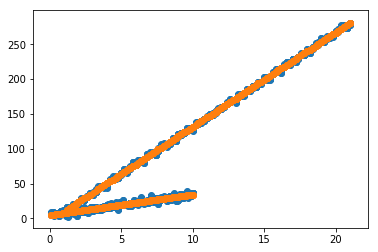

In [20]:
plt.scatter(df1_train['dose']+df1_train['sex']+df1_train['DS_combo'],y2)
plt.scatter(df1_test['sex']+df1_test['dose']+df1_test['DS_combo'], y_pred2)

/home/abhishek/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Range of error')

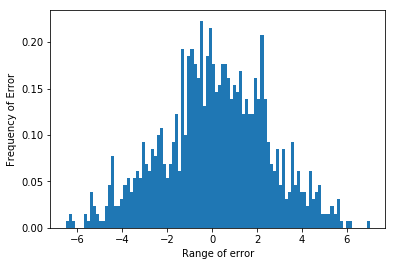

In [21]:
plt.hist(np.asarray(dataset2['Error'], dtype='float'), bins=100, normed=True) #plot of frequency of errors vs range of errors.
plt.ylabel('Frequency of Error');
plt.xlabel('Range of error') #THese are the errors divided into bins of approx. equal sizes.